#Import Libaries

In [ ]:
pip install pyvi

In [ ]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pyvi import ViTokenizer
from sklearn.model_selection import train_test_split
import seaborn as sb
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import  LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import joblib
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

#Data Loading


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_json('/content/drive/MyDrive/CS114/FinalDataset.json')
dataset

,title,text,is_negative
0,Kẻ giết vợ sa lưới sau 27 năm,Cục Điều tra Liên bang Mỹ (FBI) hôm 13/4 tuyên...,1
1,Căn hầm 'ác mộng' trong nhà kẻ bạo dâm,"John Jamelske sinh năm 1935, làm nghề sửa chữa...",1
2,Nhật bắt người Việt nhận 1 kg ma túy giấu tron...,"Hai nghi phạm Tran Duc Phi, 23 tuổi, quốc tịch...",1
3,Chó cưng trùm băng đảng nghe theo hiệu lệnh cả...,Ba người đàn ông bị cảnh sát bắt giữ ngày 28/7...,1
4,Tội phạm có ngoại hình hấp dẫn dễ được giảm án,"Theo một số nghiên cứu trên thế giới, người có...",1
...,...,...,...
3366,Trận chiến băng đảng 'tắm máu' nhà tù Ecuador,"Sau trận hỗn chiến đẫm máu trong tù, thi thể c...",1
3367,"Pence lên án bạo lực, kêu gọi quốc hội tiếp tụ...",Ông Pence đang chủ trì phiên họp chung lưỡng v...,1
3368,Liên Hợp Quốc lên án dùng bạo lực đối phó biểu...,Tổng thư ký Liên Hợp Quốc Antonio Guterres phá...,1
3369,'Không đánh thì dạy con bằng cách nào?',"vì không hoàn thành bài tập về nhà, có ý kiến...",1


#Data Processing

In [ ]:
dataset.columns = ['Title','Text','Is_neg']
dataset.head()

,Title,Text,Is_neg
0,Kẻ giết vợ sa lưới sau 27 năm,Cục Điều tra Liên bang Mỹ (FBI) hôm 13/4 tuyên...,1
1,Căn hầm 'ác mộng' trong nhà kẻ bạo dâm,"John Jamelske sinh năm 1935, làm nghề sửa chữa...",1
2,Nhật bắt người Việt nhận 1 kg ma túy giấu tron...,"Hai nghi phạm Tran Duc Phi, 23 tuổi, quốc tịch...",1
3,Chó cưng trùm băng đảng nghe theo hiệu lệnh cả...,Ba người đàn ông bị cảnh sát bắt giữ ngày 28/7...,1
4,Tội phạm có ngoại hình hấp dẫn dễ được giảm án,"Theo một số nghiên cứu trên thế giới, người có...",1


In [ ]:
#Remove NaN
if dataset.isnull().values.any():
  dataset = dataset.dropna()
dataset

,Title,Text,Is_neg
0,Kẻ giết vợ sa lưới sau 27 năm,Cục Điều tra Liên bang Mỹ (FBI) hôm 13/4 tuyên...,1
1,Căn hầm 'ác mộng' trong nhà kẻ bạo dâm,"John Jamelske sinh năm 1935, làm nghề sửa chữa...",1
2,Nhật bắt người Việt nhận 1 kg ma túy giấu tron...,"Hai nghi phạm Tran Duc Phi, 23 tuổi, quốc tịch...",1
3,Chó cưng trùm băng đảng nghe theo hiệu lệnh cả...,Ba người đàn ông bị cảnh sát bắt giữ ngày 28/7...,1
4,Tội phạm có ngoại hình hấp dẫn dễ được giảm án,"Theo một số nghiên cứu trên thế giới, người có...",1
...,...,...,...
3366,Trận chiến băng đảng 'tắm máu' nhà tù Ecuador,"Sau trận hỗn chiến đẫm máu trong tù, thi thể c...",1
3367,"Pence lên án bạo lực, kêu gọi quốc hội tiếp tụ...",Ông Pence đang chủ trì phiên họp chung lưỡng v...,1
3368,Liên Hợp Quốc lên án dùng bạo lực đối phó biểu...,Tổng thư ký Liên Hợp Quốc Antonio Guterres phá...,1
3369,'Không đánh thì dạy con bằng cách nào?',"vì không hoàn thành bài tập về nhà, có ý kiến...",1


In [ ]:
#Remove Duplication
if dataset['Title'].duplicated().any():
  dataset = dataset.drop_duplicates()
dataset.shape

(3354, 3)

In [ ]:
#Lowercasing
dataset[['Title','Text']] = dataset[['Title','Text']].apply(lambda x: x.str.lower())
dataset.head()

<ipython-input-8-00d2c11c027b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[['Title','Text']] = dataset[['Title','Text']].apply(lambda x: x.str.lower())


,Title,Text,Is_neg
0,kẻ giết vợ sa lưới sau 27 năm,cục điều tra liên bang mỹ (fbi) hôm 13/4 tuyên...,1
1,căn hầm 'ác mộng' trong nhà kẻ bạo dâm,"john jamelske sinh năm 1935, làm nghề sửa chữa...",1
2,nhật bắt người việt nhận 1 kg ma túy giấu tron...,"hai nghi phạm tran duc phi, 23 tuổi, quốc tịch...",1
3,chó cưng trùm băng đảng nghe theo hiệu lệnh cả...,ba người đàn ông bị cảnh sát bắt giữ ngày 28/7...,1
4,tội phạm có ngoại hình hấp dẫn dễ được giảm án,"theo một số nghiên cứu trên thế giới, người có...",1


In [ ]:
#Remove Punctuations
def remove_punctuation(title):
    title = [char for char in title if char not in string.punctuation]
    removed = ''.join(title)
    return removed
dataset['Title'] = dataset['Title'].apply(remove_punctuation)
dataset['Text'] = dataset['Text'].apply(remove_punctuation)
dataset

<ipython-input-9-4452987bc72b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Title'] = dataset['Title'].apply(remove_punctuation)
<ipython-input-9-4452987bc72b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Text'] = dataset['Text'].apply(remove_punctuation)


,Title,Text,Is_neg
0,kẻ giết vợ sa lưới sau 27 năm,cục điều tra liên bang mỹ fbi hôm 134 tuyên bố...,1
1,căn hầm ác mộng trong nhà kẻ bạo dâm,john jamelske sinh năm 1935 làm nghề sửa chữa ...,1
2,nhật bắt người việt nhận 1 kg ma túy giấu tron...,hai nghi phạm tran duc phi 23 tuổi quốc tịch v...,1
3,chó cưng trùm băng đảng nghe theo hiệu lệnh cả...,ba người đàn ông bị cảnh sát bắt giữ ngày 287 ...,1
4,tội phạm có ngoại hình hấp dẫn dễ được giảm án,theo một số nghiên cứu trên thế giới người có ...,1
...,...,...,...
3366,trận chiến băng đảng tắm máu nhà tù ecuador,sau trận hỗn chiến đẫm máu trong tù thi thể ch...,1
3367,pence lên án bạo lực kêu gọi quốc hội tiếp tục...,ông pence đang chủ trì phiên họp chung lưỡng v...,1
3368,liên hợp quốc lên án dùng bạo lực đối phó biểu...,tổng thư ký liên hợp quốc antonio guterres phá...,1
3369,không đánh thì dạy con bằng cách nào,vì không hoàn thành bài tập về nhà có ý kiến ...,1


In [ ]:
#Remove numbers
def remove_numbers(text):
    return re.sub("\d+", "", text)

dataset['Title'] = dataset['Title'].apply(remove_numbers)
dataset['Text'] = dataset['Text'].apply(remove_numbers)
dataset

<ipython-input-10-238280ed7a09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Title'] = dataset['Title'].apply(remove_numbers)
<ipython-input-10-238280ed7a09>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Text'] = dataset['Text'].apply(remove_numbers)


,Title,Text,Is_neg
0,kẻ giết vợ sa lưới sau năm,cục điều tra liên bang mỹ fbi hôm tuyên bố đã...,1
1,căn hầm ác mộng trong nhà kẻ bạo dâm,john jamelske sinh năm làm nghề sửa chữa và t...,1
2,nhật bắt người việt nhận kg ma túy giấu trong...,hai nghi phạm tran duc phi tuổi quốc tịch việ...,1
3,chó cưng trùm băng đảng nghe theo hiệu lệnh cả...,ba người đàn ông bị cảnh sát bắt giữ ngày tại...,1
4,tội phạm có ngoại hình hấp dẫn dễ được giảm án,theo một số nghiên cứu trên thế giới người có ...,1
...,...,...,...
3366,trận chiến băng đảng tắm máu nhà tù ecuador,sau trận hỗn chiến đẫm máu trong tù thi thể ch...,1
3367,pence lên án bạo lực kêu gọi quốc hội tiếp tục...,ông pence đang chủ trì phiên họp chung lưỡng v...,1
3368,liên hợp quốc lên án dùng bạo lực đối phó biểu...,tổng thư ký liên hợp quốc antonio guterres phá...,1
3369,không đánh thì dạy con bằng cách nào,vì không hoàn thành bài tập về nhà có ý kiến ...,1


In [ ]:
#Tokenizer
dataset['Title'] = dataset['Title'].apply(ViTokenizer.tokenize)
dataset['Text'] = dataset['Text'].apply(ViTokenizer.tokenize)
dataset.head()

<ipython-input-11-ca7250b17f94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Title'] = dataset['Title'].apply(ViTokenizer.tokenize)
<ipython-input-11-ca7250b17f94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Text'] = dataset['Text'].apply(ViTokenizer.tokenize)


,Title,Text,Is_neg
0,kẻ giết vợ sa lưới sau năm,cục điều_tra liên_bang mỹ fbi hôm tuyên_bố đã ...,1
1,căn hầm ác_mộng trong nhà kẻ bạo dâm,john jamelske sinh năm làm nghề sửa_chữa và th...,1
2,nhật bắt người việt nhận kg ma_túy giấu trong ...,hai nghi phạm tran duc phi tuổi quốc_tịch việt...,1
3,chó cưng trùm băng_đảng nghe theo hiệu_lệnh cả...,ba người đàn_ông bị cảnh_sát bắt_giữ ngày tại ...,1
4,tội_phạm có ngoại_hình hấp_dẫn dễ được giảm_án,theo một_số nghiên_cứu trên thế_giới người có ...,1


In [ ]:
import requests

# URL of file stopwords
url = 'https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords.txt'

# Request
response = requests.get(url)

if response.status_code == 200:
    # Save file 'vietnamese-stopwords.txt'
    with open('vietnamese-stopwords.txt', 'w') as f:
        f.write(response.text)
else:
    print('Error:', response.status_code)

with open('vietnamese-stopwords.txt', 'r') as f:
    vietnamese_stopwords = f.read().splitlines()

In [ ]:
vietnamese_stopwords

['a lô',
 'a ha',
 'ai',
 'ai ai',
 'ai nấy',
 'ai đó',
 'alô',
 'amen',
 'anh',
 'anh ấy',
 'ba',
 'ba ba',
 'ba bản',
 'ba cùng',
 'ba họ',
 'ba ngày',
 'ba ngôi',
 'ba tăng',
 'bao giờ',
 'bao lâu',
 'bao nhiêu',
 'bao nả',
 'bay biến',
 'biết',
 'biết bao',
 'biết bao nhiêu',
 'biết chắc',
 'biết chừng nào',
 'biết mình',
 'biết mấy',
 'biết thế',
 'biết trước',
 'biết việc',
 'biết đâu',
 'biết đâu chừng',
 'biết đâu đấy',
 'biết được',
 'buổi',
 'buổi làm',
 'buổi mới',
 'buổi ngày',
 'buổi sớm',
 'bà',
 'bà ấy',
 'bài',
 'bài bác',
 'bài bỏ',
 'bài cái',
 'bác',
 'bán',
 'bán cấp',
 'bán dạ',
 'bán thế',
 'bây bẩy',
 'bây chừ',
 'bây giờ',
 'bây nhiêu',
 'bèn',
 'béng',
 'bên',
 'bên bị',
 'bên có',
 'bên cạnh',
 'bông',
 'bước',
 'bước khỏi',
 'bước tới',
 'bước đi',
 'bạn',
 'bản',
 'bản bộ',
 'bản riêng',
 'bản thân',
 'bản ý',
 'bất chợt',
 'bất cứ',
 'bất giác',
 'bất kì',
 'bất kể',
 'bất kỳ',
 'bất luận',
 'bất ngờ',
 'bất nhược',
 'bất quá',
 'bất quá chỉ',
 'bất thình l

In [ ]:
dataset['Title'] = dataset['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (vietnamese_stopwords)]))
dataset['Text'] = dataset['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (vietnamese_stopwords)]))
dataset.head()

<ipython-input-14-fc90d088f02f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Title'] = dataset['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (vietnamese_stopwords)]))
<ipython-input-14-fc90d088f02f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Text'] = dataset['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (vietnamese_stopwords)]))


,Title,Text,Is_neg
0,kẻ giết vợ sa lưới,cục điều_tra liên_bang mỹ fbi hôm tuyên_bố bắt...,1
1,hầm ác_mộng kẻ bạo dâm,john jamelske sinh nghề sửa_chữa thợ_mộc tích_...,1
2,nhật bắt việt kg ma_túy giấu túi trà,hai nghi phạm tran duc phi quốc_tịch việt_nam ...,1
3,chó cưng trùm băng_đảng hiệu_lệnh cảnh_sát,đàn_ông cảnh_sát bắt_giữ trang_trại hortolandi...,1
4,tội_phạm ngoại_hình hấp_dẫn giảm_án,một_số nghiên_cứu thế_giới khuôn_mặt đẹp dễ_ch...,1


#Data Statistics

In [ ]:
print("Negative news size: ", len(dataset[dataset['Is_neg']==1]), "\nPositive news size: ", len(dataset[dataset['Is_neg']==0]))

Negative news size:  1615 
Positive news size:  1739


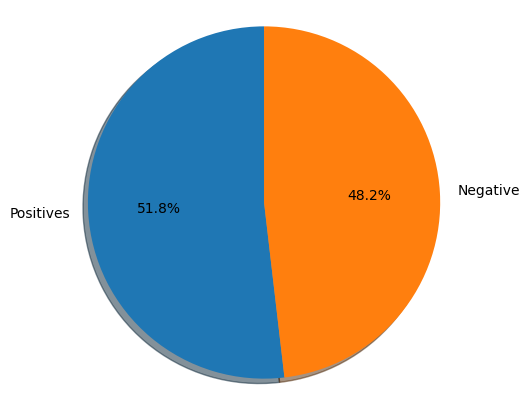

In [ ]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(dataset[dataset['Is_neg']==0]), len(dataset[dataset['Is_neg']==1])]

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

##Word Statistics

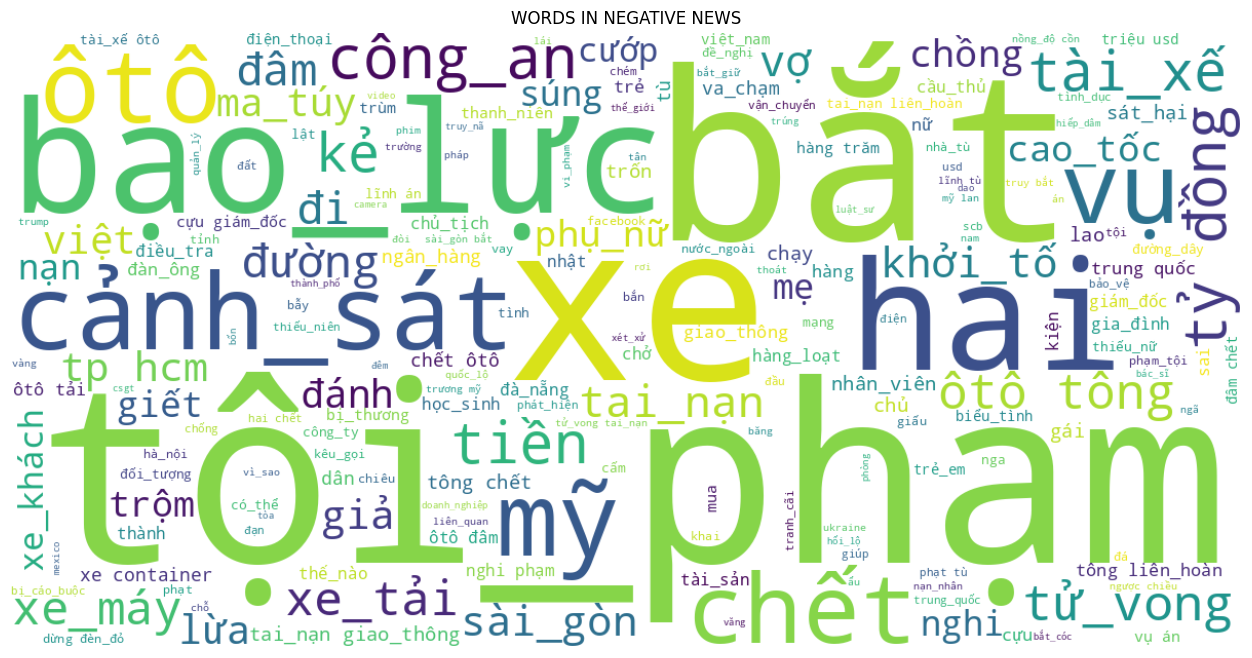

In [ ]:
#Word in negative news
negative = dataset.loc[(dataset['Is_neg'] == 1)]
wordcloud = WordCloud(width = 1200, height = 600, background_color="white").generate(' '.join(negative.Title))
plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("WORDS IN NEGATIVE NEWS")
plt.axis("off")
plt.show()

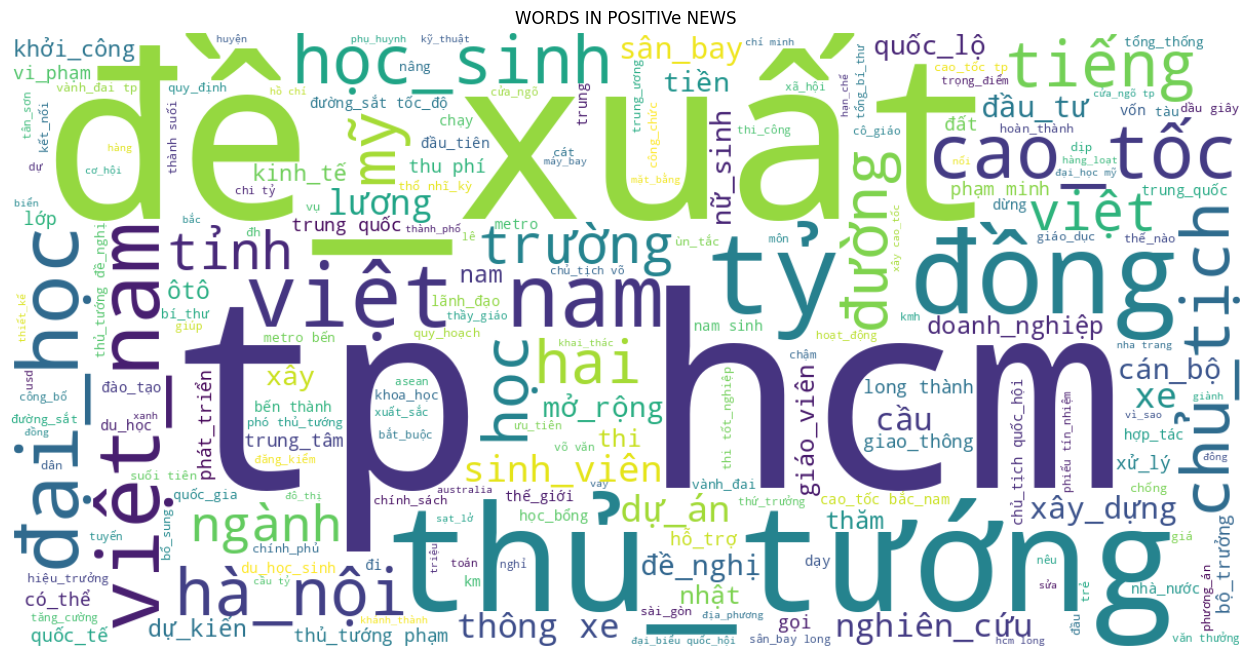

In [ ]:
#Word in postive news
positive = dataset.loc[(dataset['Is_neg'] == 0)]
wordcloud = WordCloud(width = 1200, height = 600, background_color="white").generate(' '.join(positive.Title))
plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("WORDS IN POSITIVe NEWS")
plt.axis("off")
plt.show()

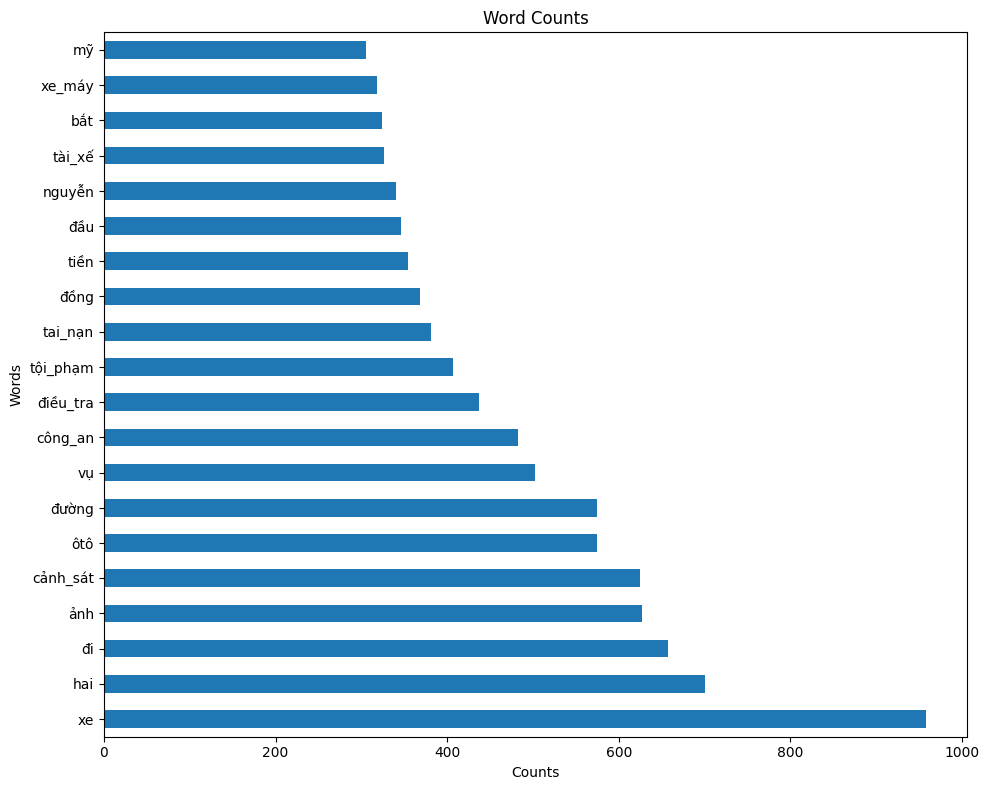

In [ ]:
words = negative.Title.str.split() + negative.Text.str.split()

# Thống kê số lượng mỗi từ
word_counts = words.explode().value_counts()

word_counts.sort_values(ascending=False)[:20].plot(kind='barh', figsize=(10,8))

plt.xlabel('Counts')
plt.ylabel('Words')
plt.title('Word Counts')

plt.tight_layout()
plt.show()


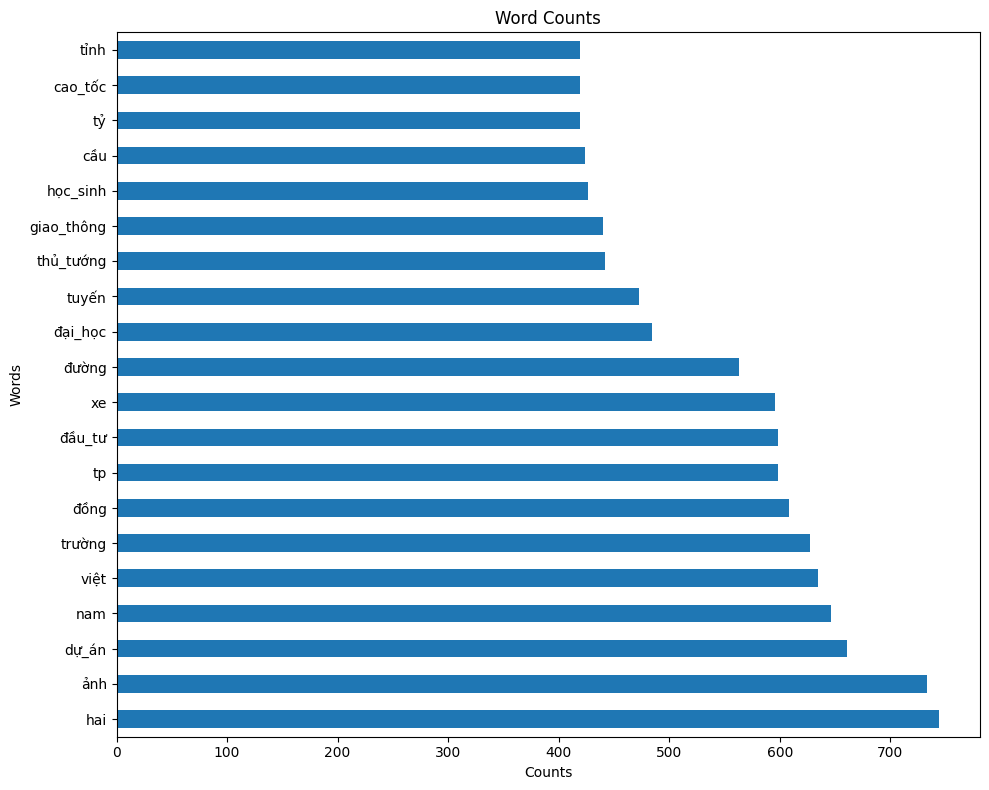

In [ ]:
words = positive.Title.str.split() + positive.Text.str.split()

# Thống kê số lượng mỗi từ
word_counts = words.explode().value_counts()

word_counts.sort_values(ascending=False)[:20].plot(kind='barh', figsize=(10,8))

plt.xlabel('Counts')
plt.ylabel('Words')
plt.title('Word Counts')

plt.tight_layout()
plt.show()

#Split Data

In [ ]:
train, dev = train_test_split(dataset, test_size = 0.4, random_state = 42)

In [ ]:
print('Shape of train',train.shape)
print('Shape of dev',dev.shape)

Shape of train (2012, 3)
Shape of dev (1342, 3)


[Text(0.5, 1.0, 'Distribution in train')]

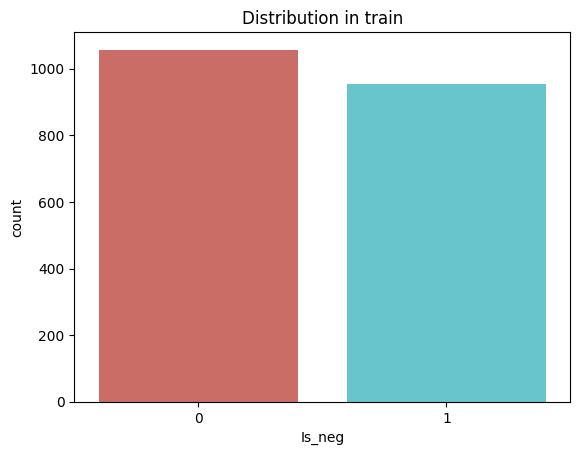

In [ ]:
sb.countplot(x='Is_neg', data = train, palette='hls').set(title = "Distribution in train")

[Text(0.5, 1.0, 'Distribution in dev')]

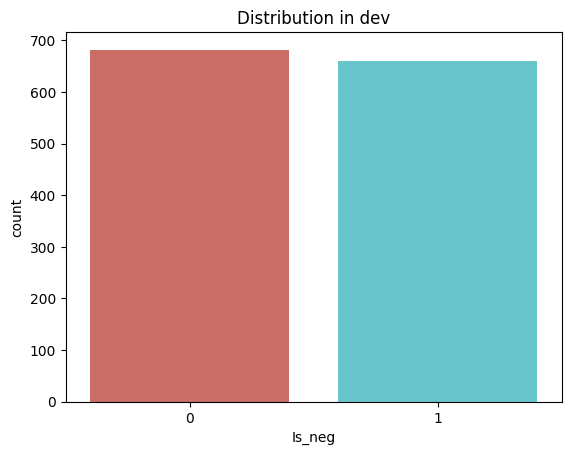

In [ ]:
sb.countplot(x='Is_neg', data = dev, palette='hls').set(title = "Distribution in dev")